In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import datetime
import seaborn as sns
import numpy as np

In [27]:
### We recived four seprated datasets from PVTA

In [28]:
### UMTS

In [29]:
df1 = pd.read_csv(r'../../data/tidy/energy-validation-april2022-31march.csv')

In [30]:
df1=df1.drop(columns='Unnamed: 0')

In [31]:
df1

,timestamp,equipment_id,gallons,date,Powertrain
0,2022-03-31 00:11:00,3310,33.10,2022-03-31,conventional
1,2022-03-31 00:17:00,3303,6.40,2022-03-31,conventional
2,2022-03-31 00:25:00,3320,12.40,2022-03-31,conventional
3,2022-03-31 00:41:00,3402,34.80,2022-03-31,hybrid
4,2022-03-31 00:49:00,3226,39.40,2022-03-31,conventional
...,...,...,...,...,...
3065,2022-04-30 22:52:00,3228,20.90,2022-04-30,conventional
3066,2022-04-30 22:53:00,1862,41.22,2022-04-30,conventional
3067,2022-04-30 23:29:00,3314,23.50,2022-04-30,conventional
3068,2022-04-30 23:43:00,3401,40.60,2022-04-30,hybrid


In [32]:
df1['timestamp']= pd.to_datetime(df1['timestamp'])

In [33]:
df1.sort_values(by=['equipment_id','timestamp'], ascending=True, inplace=True)

In [34]:
df1

,timestamp,equipment_id,gallons,date,Powertrain
2659,2022-04-27 17:39:00,1320,0.68,2022-04-27,electric
2920,2022-04-29 18:56:00,1320,0.69,2022-04-29,electric
1760,2022-04-18 18:24:00,1321,1.83,2022-04-18,electric
1857,2022-04-19 17:56:00,1321,0.58,2022-04-19,electric
2915,2022-04-29 18:47:00,1321,0.66,2022-04-29,electric
...,...,...,...,...,...
2437,2022-04-25 18:43:00,7902,24.60,2022-04-25,conventional
2576,2022-04-26 20:14:00,7902,12.20,2022-04-26,conventional
2656,2022-04-27 17:23:00,7902,23.80,2022-04-27,conventional
2878,2022-04-29 06:56:00,7902,19.00,2022-04-29,conventional


In [35]:
df1['date'] = pd.to_datetime(df1['timestamp']).dt.date
df1['time'] = pd.to_datetime(df1['timestamp']).dt.time

In [36]:
df1

,timestamp,equipment_id,gallons,date,Powertrain,time
2659,2022-04-27 17:39:00,1320,0.68,2022-04-27,electric,17:39:00
2920,2022-04-29 18:56:00,1320,0.69,2022-04-29,electric,18:56:00
1760,2022-04-18 18:24:00,1321,1.83,2022-04-18,electric,18:24:00
1857,2022-04-19 17:56:00,1321,0.58,2022-04-19,electric,17:56:00
2915,2022-04-29 18:47:00,1321,0.66,2022-04-29,electric,18:47:00
...,...,...,...,...,...,...
2437,2022-04-25 18:43:00,7902,24.60,2022-04-25,conventional,18:43:00
2576,2022-04-26 20:14:00,7902,12.20,2022-04-26,conventional,20:14:00
2656,2022-04-27 17:23:00,7902,23.80,2022-04-27,conventional,17:23:00
2878,2022-04-29 06:56:00,7902,19.00,2022-04-29,conventional,06:56:00


In [37]:
vehicles=df1['equipment_id'].unique()

In [38]:
df1_modified = pd.DataFrame(columns=['timestamp', 'equipment_id', 'gallons', 'date', 'Powertrain', 'time'])
for v in vehicles:
    df1_vehicle = df1.loc[(df1["equipment_id"] == v)].copy()
    df1_vehicle.sort_values(by=['timestamp'], ascending=True, inplace=True)
    #df1_vehicle['time_delta_in_hour']=pd.to_timedelta(df1_vehicle['timestamp'].astype(str)).diff(-1).dt.total_seconds().div(3600)
    df1_vehicle['time_delta'] = (df1_vehicle['timestamp']-df1_vehicle['timestamp'].shift())
    #df1_modified = df1_modified.append(df1_vehicle, ignore_index = True)
    df1_modified=pd.concat([df1_modified, df1_vehicle])

In [39]:
df1_modified

,timestamp,equipment_id,gallons,date,Powertrain,time,time_delta
2659,2022-04-27 17:39:00,1320,0.68,2022-04-27,electric,17:39:00,NaT
2920,2022-04-29 18:56:00,1320,0.69,2022-04-29,electric,18:56:00,2 days 01:17:00
1760,2022-04-18 18:24:00,1321,1.83,2022-04-18,electric,18:24:00,NaT
1857,2022-04-19 17:56:00,1321,0.58,2022-04-19,electric,17:56:00,0 days 23:32:00
2915,2022-04-29 18:47:00,1321,0.66,2022-04-29,electric,18:47:00,10 days 00:51:00
...,...,...,...,...,...,...,...
2437,2022-04-25 18:43:00,7902,24.60,2022-04-25,conventional,18:43:00,0 days 11:35:00
2576,2022-04-26 20:14:00,7902,12.20,2022-04-26,conventional,20:14:00,1 days 01:31:00
2656,2022-04-27 17:23:00,7902,23.80,2022-04-27,conventional,17:23:00,0 days 21:09:00
2878,2022-04-29 06:56:00,7902,19.00,2022-04-29,conventional,06:56:00,1 days 13:33:00


In [40]:
df1_modified['time_delta_in_hours'] = df1_modified['time_delta'].dt.total_seconds()/3600

In [41]:
df1_modified

,timestamp,equipment_id,gallons,date,Powertrain,time,time_delta,time_delta_in_hours
2659,2022-04-27 17:39:00,1320,0.68,2022-04-27,electric,17:39:00,NaT,NaN
2920,2022-04-29 18:56:00,1320,0.69,2022-04-29,electric,18:56:00,2 days 01:17:00,49.283333
1760,2022-04-18 18:24:00,1321,1.83,2022-04-18,electric,18:24:00,NaT,NaN
1857,2022-04-19 17:56:00,1321,0.58,2022-04-19,electric,17:56:00,0 days 23:32:00,23.533333
2915,2022-04-29 18:47:00,1321,0.66,2022-04-29,electric,18:47:00,10 days 00:51:00,240.850000
...,...,...,...,...,...,...,...,...
2437,2022-04-25 18:43:00,7902,24.60,2022-04-25,conventional,18:43:00,0 days 11:35:00,11.583333
2576,2022-04-26 20:14:00,7902,12.20,2022-04-26,conventional,20:14:00,1 days 01:31:00,25.516667
2656,2022-04-27 17:23:00,7902,23.80,2022-04-27,conventional,17:23:00,0 days 21:09:00,21.150000
2878,2022-04-29 06:56:00,7902,19.00,2022-04-29,conventional,06:56:00,1 days 13:33:00,37.550000


<AxesSubplot: >

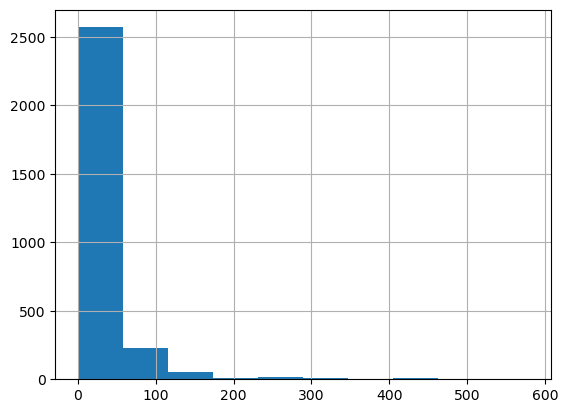

In [42]:
df1_modified['time_delta_in_hours'].dropna().hist()

In [43]:
df1_modified_dropped_nans = df1_modified.dropna()
df1_modified_dropped_zeros_and_nans= df1_modified_dropped_nans[df1_modified_dropped_nans['time_delta_in_hours'] != 0]

<AxesSubplot: >

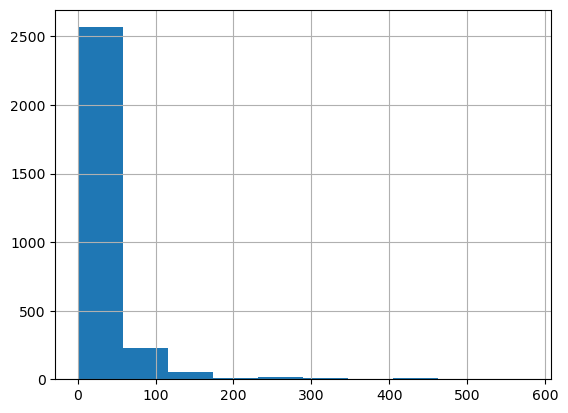

In [44]:
df1_modified_dropped_zeros_and_nans['time_delta_in_hours'].hist()

In [45]:
df1_modified_dropped_zeros_and_nans['time_delta_in_hours'].min()

0.016666666666666666

In [46]:
df1_modified_dropped_zeros_and_nans['time_delta_in_hours'].max()

579.0666666666667

In [47]:
df1_modified_dropped_zeros_and_nans[df1_modified_dropped_zeros_and_nans['time_delta_in_hours'] < 1]

,timestamp,equipment_id,gallons,date,Powertrain,time,time_delta,time_delta_in_hours
1789,2022-04-18 19:49:00,1322,0.46,2022-04-18,electric,19:49:00,0 days 00:01:00,0.016667
2895,2022-04-29 16:05:00,1563,1.43,2022-04-29,conventional,16:05:00,0 days 00:48:00,0.800000
2006,2022-04-20 20:32:00,1701,2.91,2022-04-20,conventional,20:32:00,0 days 00:02:00,0.033333
411,2022-04-04 19:28:00,1722,27.48,2022-04-04,conventional,19:28:00,0 days 00:03:00,0.050000
809,2022-04-07 23:18:00,1722,42.38,2022-04-07,conventional,23:18:00,0 days 00:03:00,0.050000
1529,2022-04-15 16:03:00,1725,4.20,2022-04-15,conventional,16:03:00,0 days 00:35:00,0.583333
573,2022-04-05 22:19:00,1811,0.03,2022-04-05,conventional,22:19:00,0 days 00:02:00,0.033333
853,2022-04-08 17:48:00,1823,0.05,2022-04-08,conventional,17:48:00,0 days 00:01:00,0.016667
858,2022-04-08 18:22:00,1823,19.82,2022-04-08,conventional,18:22:00,0 days 00:34:00,0.566667
3008,2022-04-30 16:00:00,1859,5.12,2022-04-30,conventional,16:00:00,0 days 00:02:00,0.033333


In [48]:
df1_modified_dropped_zeros_and_nans.loc

In [49]:
# We have 19 data points with fueling interval less than one hour, all of these rows should be aggregated with privious ones
# I did that by hand and I saved it in a csv named "energy-validation-april2022-31march-without-outliers"
# I also removed fueling tickets for electric buses

In [50]:
df1 = pd.read_csv(r'../../data/tidy/energy-validation-april2022-31march-without-outliers.csv')

In [51]:
df1=df1.drop(columns='Unnamed: 0')

In [52]:
df1['timestamp']= pd.to_datetime(df1['timestamp'])

In [53]:
df1.sort_values(by=['equipment_id','timestamp'], ascending=True, inplace=True)

In [54]:
df1['date'] = pd.to_datetime(df1['timestamp']).dt.date
df1['time'] = pd.to_datetime(df1['timestamp']).dt.time

In [55]:
vehicles=df1['equipment_id'].unique()

In [56]:
df1_modified = pd.DataFrame(columns=['timestamp', 'equipment_id', 'gallons', 'date', 'Powertrain', 'time'])
for v in vehicles:
    df1_vehicle = df1.loc[(df1["equipment_id"] == v)].copy()
    df1_vehicle.sort_values(by=['timestamp'], ascending=True, inplace=True)
    #df1_vehicle['time_delta_in_hour']=pd.to_timedelta(df1_vehicle['timestamp'].astype(str)).diff(-1).dt.total_seconds().div(3600)
    df1_vehicle['time_delta'] = (df1_vehicle['timestamp']-df1_vehicle['timestamp'].shift())
    #df1_modified = df1_modified.append(df1_vehicle, ignore_index = True)
    df1_modified=pd.concat([df1_modified, df1_vehicle])

In [57]:
df1_modified['time_delta_in_hours'] = df1_modified['time_delta'].dt.total_seconds()/3600

<AxesSubplot: >

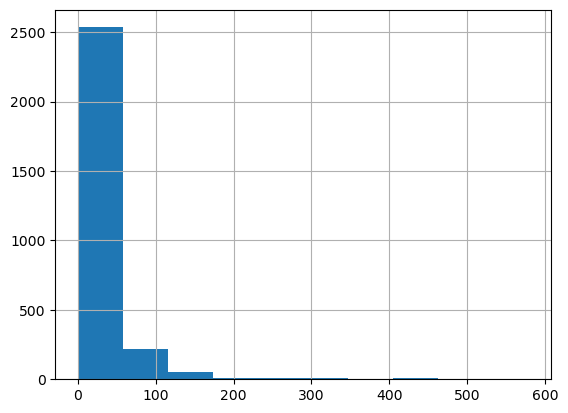

In [58]:
df1_modified['time_delta_in_hours'].dropna().hist()

In [59]:
df1_modified_dropped_nans = df1_modified.dropna()
df1_modified_dropped_zeros_and_nans= df1_modified_dropped_nans[df1_modified_dropped_nans['time_delta_in_hours'] != 0]

<AxesSubplot: >

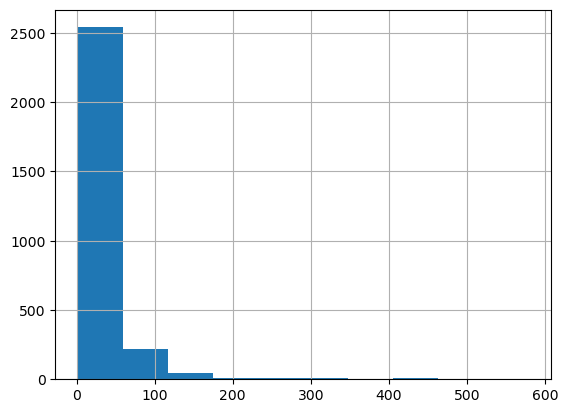

In [60]:
df1_modified_dropped_zeros_and_nans['time_delta_in_hours'].hist()

In [61]:
df1_modified_dropped_zeros_and_nans[df1_modified_dropped_zeros_and_nans['time_delta_in_hours'] > 200]

,timestamp,equipment_id,gallons,date,Powertrain,time,time_delta,time_delta_in_hours
51,2022-04-26 17:35:00,1557,17.33,2022-04-26,conventional,17:35:00,13 days 01:52:00,313.866667
280,2022-04-23 18:17:00,1577,44.34,2022-04-23,conventional,18:17:00,10 days 02:11:00,242.183333
290,2022-04-21 21:37:00,1578,1.19,2022-04-21,conventional,21:37:00,19 days 04:56:00,460.933333
599,2022-04-29 15:32:00,1662,39.29,2022-04-29,conventional,15:32:00,17 days 00:02:00,408.033333
789,2022-04-15 22:53:00,1715,13.47,2022-04-15,conventional,22:53:00,9 days 06:52:00,222.866667
916,2022-04-25 16:02:00,1722,14.92,2022-04-25,conventional,16:02:00,13 days 16:49:00,328.816667
1166,2022-04-29 16:27:00,1803,19.26,2022-04-29,hybrid,16:27:00,10 days 20:52:00,260.866667
1232,2022-04-15 22:08:00,1812,56.82,2022-04-15,conventional,22:08:00,11 days 00:18:00,264.300000
1362,2022-04-15 13:08:00,1821,29.26,2022-04-15,conventional,13:08:00,12 days 15:48:00,303.800000
1378,2022-04-15 22:21:00,1822,49.30,2022-04-15,conventional,22:21:00,9 days 06:11:00,222.183333


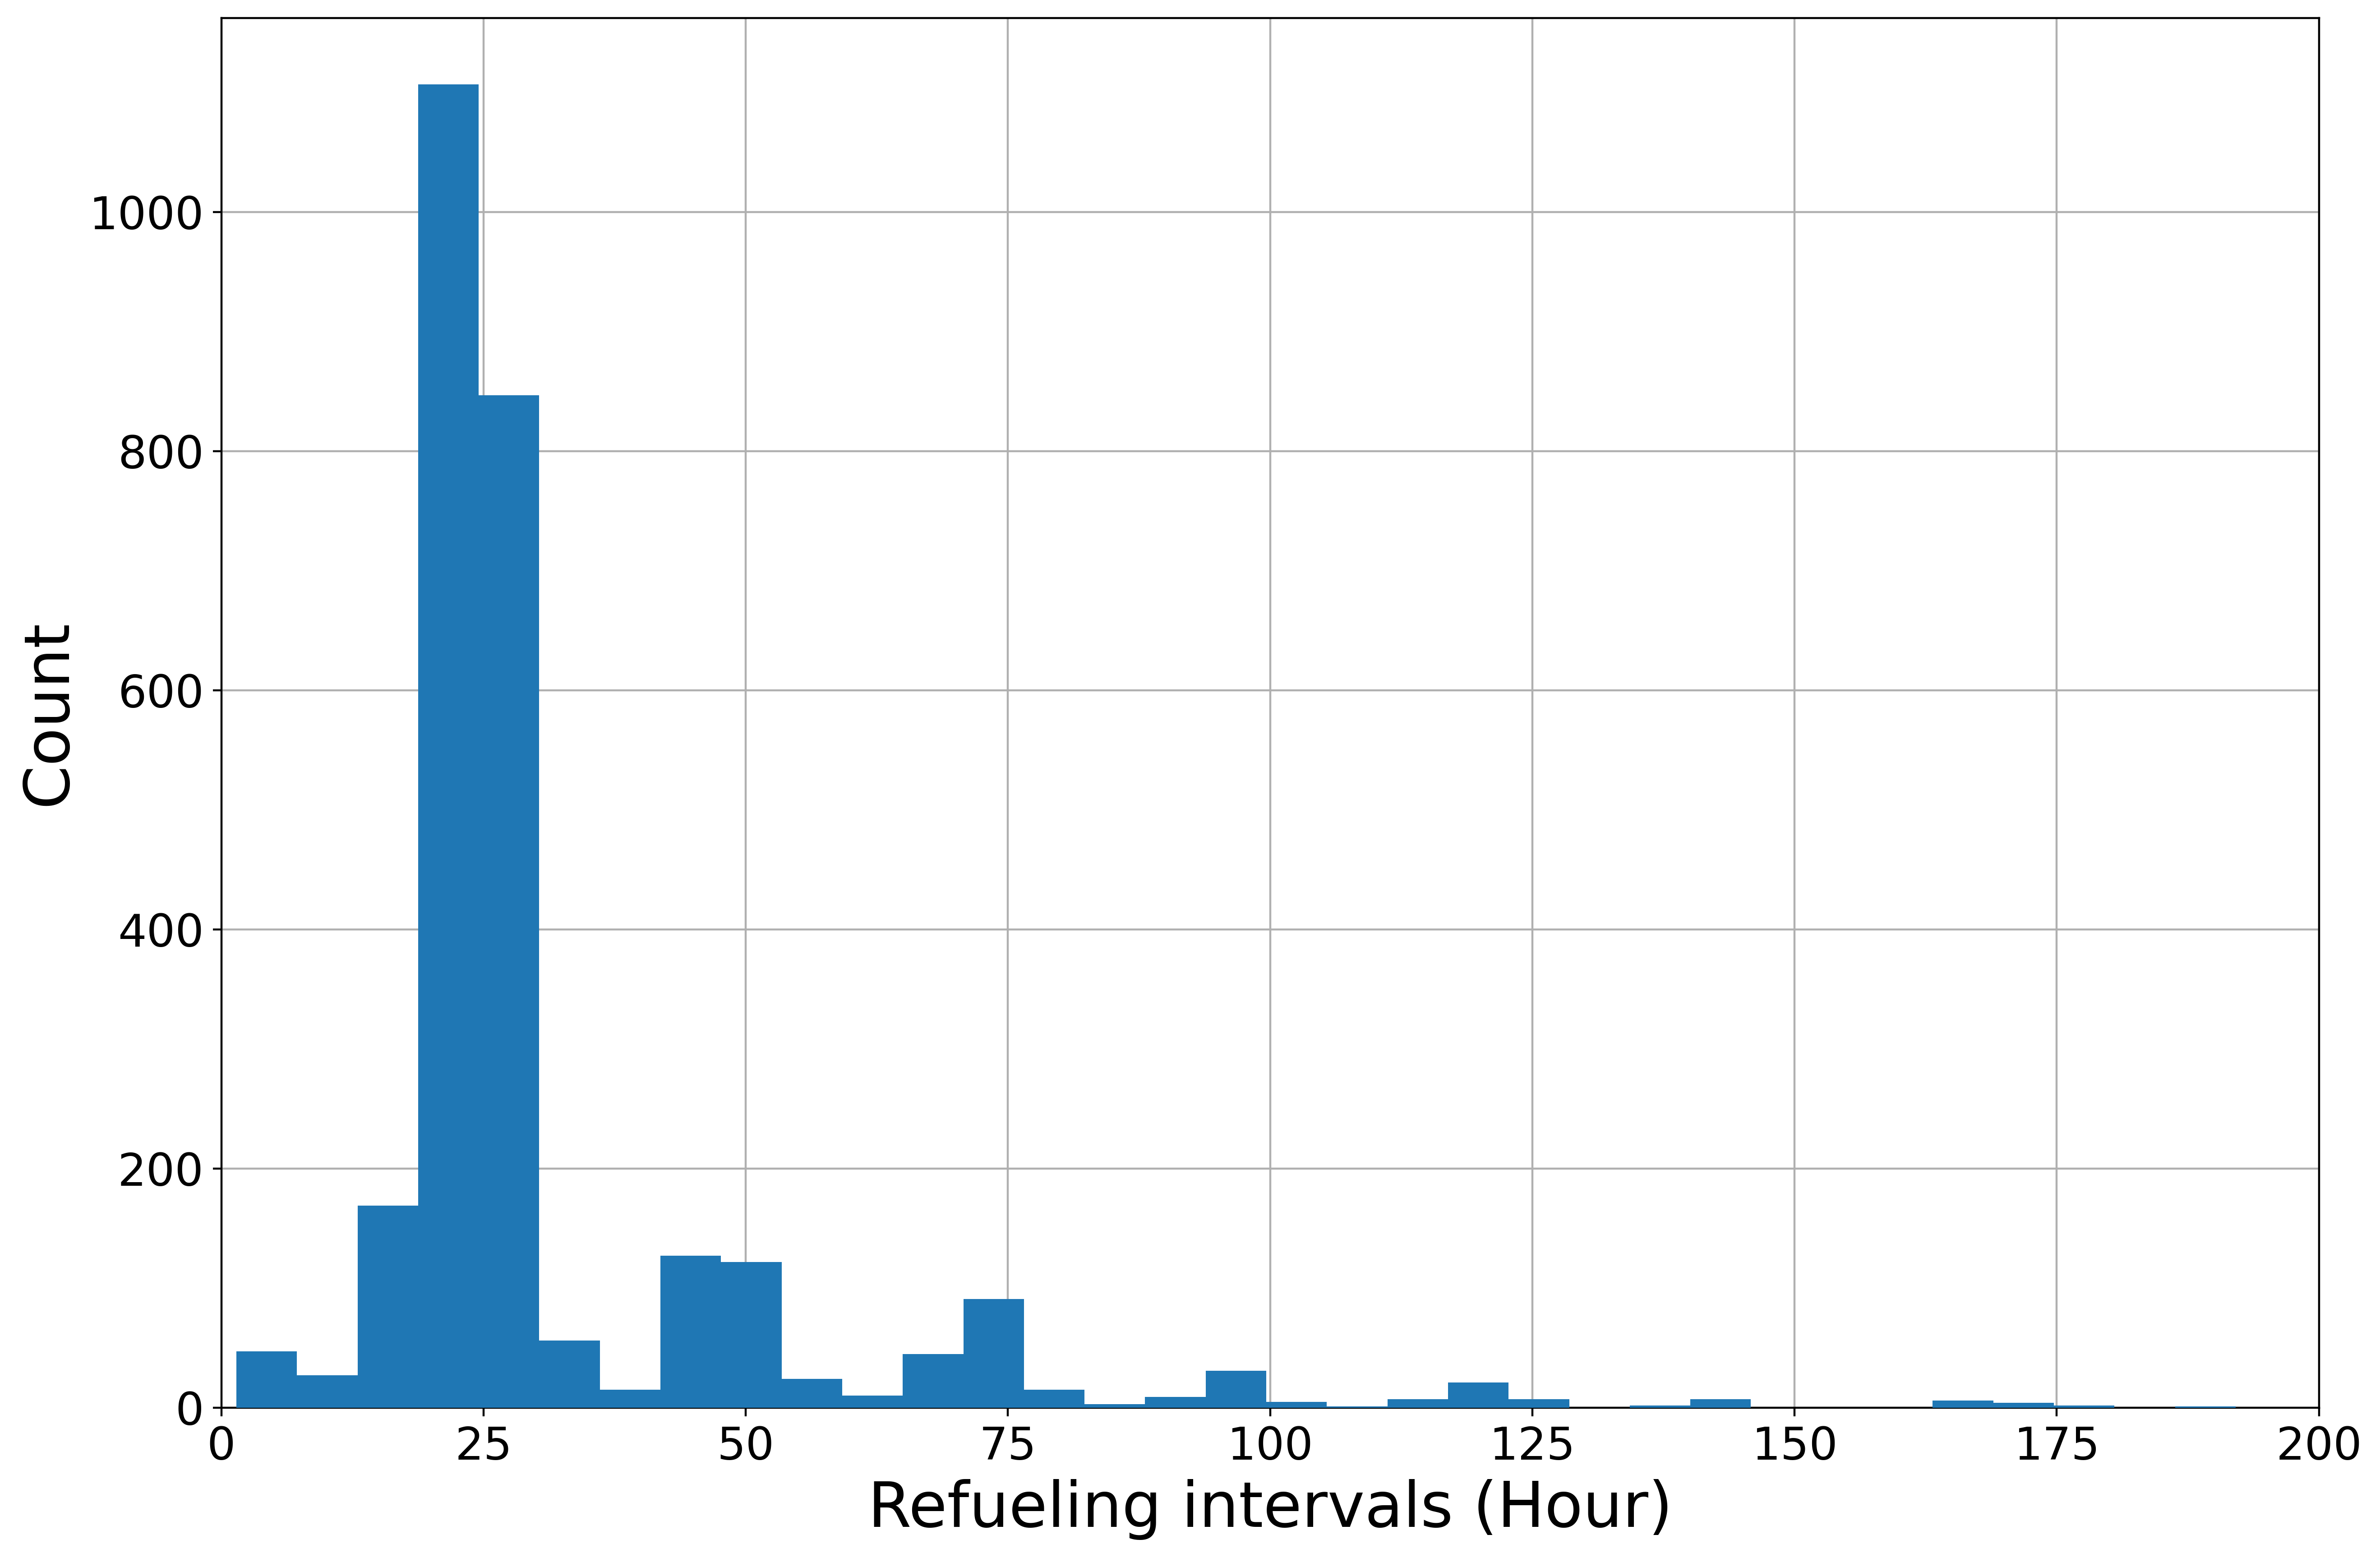

In [74]:
figure(figsize=(15 , 10), dpi=400)
ax=df1_modified_dropped_zeros_and_nans['time_delta_in_hours'].hist(bins=100, zorder=3)
ax.set_xlabel('Refueling intervals (Hour)', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0,200)
plt.savefig(r'../../figures/hist-fueling-intervals.png', dpi=400, bbox_inches='tight')

In [63]:
df1_modified_dropped_zeros_and_nans['time_delta_in_hours'].mean()

35.05182704735049

In [64]:
df1_modified_dropped_zeros_and_nans['time_delta_in_hours'].min()

1.4333333333333333

In [71]:
df1_modified_dropped_zeros_and_nans['time_delta_in_hours'].max()

579.0666666666667

In [72]:
df1_modified_dropped_zeros_and_nans['time_delta_in_hours'].median()

24.8

In [235]:
df1_modified_dropped_zeros_and_nans[(df1_modified_dropped_zeros_and_nans['date'] < datetime.date(2022,4,23))]

,timestamp,equipment_id,gallons,date,Powertrain,time,time_delta,time_delta_in_hours
1,2022-04-01 15:34:00,1552,27.43,2022-04-01,conventional,15:34:00,0 days 18:45:00,18.750000
2,2022-04-02 18:30:00,1552,33.15,2022-04-02,conventional,18:30:00,1 days 02:56:00,26.933333
3,2022-04-05 17:57:00,1552,52.29,2022-04-05,conventional,17:57:00,2 days 23:27:00,71.450000
4,2022-04-06 19:49:00,1552,36.69,2022-04-06,conventional,19:49:00,1 days 01:52:00,25.866667
5,2022-04-07 18:41:00,1552,45.61,2022-04-07,conventional,18:41:00,0 days 22:52:00,22.866667
...,...,...,...,...,...,...,...,...
2991,2022-04-13 17:21:00,7902,27.20,2022-04-13,conventional,17:21:00,0 days 11:42:00,11.700000
2992,2022-04-18 11:58:00,7902,34.00,2022-04-18,conventional,11:58:00,4 days 18:37:00,114.616667
2993,2022-04-19 20:20:00,7902,14.40,2022-04-19,conventional,20:20:00,1 days 08:22:00,32.366667
2994,2022-04-21 05:43:00,7902,25.00,2022-04-21,conventional,05:43:00,1 days 09:23:00,33.383333


In [236]:
df1_modified_dropped_zeros_and_nans[(df1_modified_dropped_zeros_and_nans['date'] > datetime.date(2022,4,23))]

,timestamp,equipment_id,gallons,date,Powertrain,time,time_delta,time_delta_in_hours
14,2022-04-25 19:06:00,1552,33.95,2022-04-25,conventional,19:06:00,2 days 02:46:00,50.766667
15,2022-04-27 16:01:00,1552,3.52,2022-04-27,conventional,16:01:00,1 days 20:55:00,44.916667
16,2022-04-30 21:45:00,1552,56.89,2022-04-30,conventional,21:45:00,3 days 05:44:00,77.733333
51,2022-04-26 17:35:00,1557,17.33,2022-04-26,conventional,17:35:00,13 days 01:52:00,313.866667
52,2022-04-29 19:06:00,1557,12.70,2022-04-29,conventional,19:06:00,3 days 01:31:00,73.516667
...,...,...,...,...,...,...,...,...
2998,2022-04-25 18:43:00,7902,24.60,2022-04-25,conventional,18:43:00,0 days 11:35:00,11.583333
2999,2022-04-26 20:14:00,7902,12.20,2022-04-26,conventional,20:14:00,1 days 01:31:00,25.516667
3000,2022-04-27 17:23:00,7902,23.80,2022-04-27,conventional,17:23:00,0 days 21:09:00,21.150000
3001,2022-04-29 06:56:00,7902,19.00,2022-04-29,conventional,06:56:00,1 days 13:33:00,37.550000
